# INTRODUCTION

In this project I take a deep dive into the Hospital No-show dataset that highlights how many times people scheduled for a doctors appointment have missed such appointments.
I want to figure out 3 things so as to be able to make data-driven decisions, and the 3 questions I aim to answer are as follows
1. What percentage of patients that have appointments miss their appointments 
2. Of the percentage that misses appointments, what is the gender ratio in percentages
3. Which ailment causes people to miss their appointment the most

# QUESTIONS

1. What percentage of patients that have appointments miss their appointments
2. Of the percentage that misses appointments, what is the gender ratio in percentages
3. Which ailment causes people to miss their appointment the most

In [1]:
#Import all the required python libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import the CSV file that contains the dataset I'm going to be investigating - The hospital appointment "no show" data
data = pd.read_csv('hospital_appointments.csv')

# DATA WRANGLING

In this stage, I check for duplicate values, null values, I drop colums that I wouldn't need to amswer the questions in my analysis, I check for incorrect column spellingm and replace with the right spelling

The steps I took in my data wrangling phase are highlighted below:
1. Check the head and the tail of the dataset, which are the first 5 and the last 5 rows in the dataset. This is used to quickly check if the dataset set has the right type of data in it. 
2. I use the describe() function to view basic statistical details of the dataset 
3. I print the information of the dataset using the .info() function. This typically contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)
4. I check for duplicate values using the .duplicated() method and summing it up. The result of the sum should be 0 if there are no duplicate values
5. Next I check for null values using the .isna values, and sum it up. This also returns 0 if there are no null values
6. I drop colums I will not be using for my analysis with the .drop method, and use the .head method to check my new dataset
7. I checked for, and corrected all the spelling errors in the colum labels using the .rename function
8. I convert the NoShow colums to 0s and 1s to make it easy to plot graphs 
9. I also converted the elemets on gender to 0s and 1s to make plotting it on charts easier 

In [3]:
#Checks the first 5 rows of the dataset
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Checks the last 5 rows of the dataset
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#This returns statistical data on the dataset
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Prints a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#Checks if there are any duplicated data. 0 means there are no duplicated data 
data.duplicated().sum()

0

In [8]:
#Checks if there are any null values within the data set. A sum that equals 0 means there aren't any null values 
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#Dropping columns that are not needed for this analysis 
data.drop(['PatientId', 'AppointmentID', 'Neighbourhood', 'ScheduledDay','AppointmentDay','Scholarship'], axis=1, inplace=True)

In [10]:
data.head()

,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,1,0,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,1,1,0,0,0,No


In [11]:
data_negative_age = data.query('Age < 0')
data.drop(data_negative_age.index, inplace =True)

In [12]:
#Correcting error in spelling and changing column names to recognized camel case
data= data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [13]:
data.head()

,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,62,1,0,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,1,1,0,0,0,No


In [14]:
#data_negative_age = show_data.query('age < 0')
#show_data.drop(df_negative_age.index, inplace =True)
data = data[(data['Age'] < 100 )]

In [15]:
#Change NoShow column to 0s and 1s to make plotting charts easier 
#The code here maps the Yes and No in the NoShow column to 0s and 1s respectively
data['No-show'] = [1 if x == 'Yes' else 0 for x in data['NoShow']] 

In [16]:
data['NoShow']

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: NoShow, Length: 110515, dtype: object

In [17]:
#Change Gender column to numeric to also help make getting charts easier 
#The code here maps the Females (f) and Males (m) in the Gender column to 0s and 1s respectively

data['Gender'] = [0 if x == 'F' else 1 for x in data['Gender']] 

In [18]:
data['Gender']

0         0
1         1
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Gender, Length: 110515, dtype: int64

In [19]:
#This line of code drops all the invalid inputs in the Handicap column. We need 0s and 1s, so we remove 2,3,4
data.drop(data[data['Handicap'].isin([2,3,4])].index, inplace = True)

# Exploratory Data Analysis

In this step, I start my analysis in order to answer my questions one after the other. 

1. The first barchart shows the percentages of people how show up for their appointmemt
2. I drill down into the population that failed to show up, by getting the percentage of males and females.
3. I created a function to call each colums within the dataset and plot their values against the values of column NoShow

In [20]:
#This line of code drops all the invalid values in the Handicap column, and assigns it to handicap_data
handicap_data = data.drop(data[data['Handicap'].isin([2,3,4])].index,inplace = True)

In [21]:
#QUESTION 1: WHAT IS THE PERCENTAGE OF PEOPLE THAT SHOWED UP, AND THOSE THAT DIDN'T

Text(0.5, 1.0, 'Percentage of Patients')

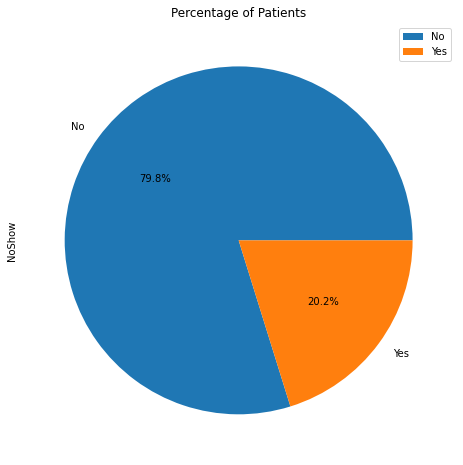

In [22]:
#Percentagas of patient that showed compared to the NoShow patients
percent = 100*data['NoShow'].value_counts()/len(data['NoShow'])
percent.plot(kind = 'pie', figsize=(8, 8), autopct='%1.1f%%', legend = True)
plt.title('Percentage of Patients')

#This code allows me get the percentage of people that showed up, and people that didn't by getting the count of the NoShow column,and dividing it by the length of the column.
#I added a title, legend and put it at an appropraite size to enable readability of the pie chart

The above pie chart shows that only about 20% of people miss their appointments. I would like to further reduce that and make sure people no longer miss their hospital appointments. I would be investigating 3 factors(Age, Neigbourhood, and Ailment) to see how they relate to patients missing their appointments.

In [23]:
#QUESTION 2: THE PERCENTAGE OF "NO SHOWS" WHAT IS THE GENDER PERCENTAGE

Text(0.5, 1.0, 'Gender of Patients')

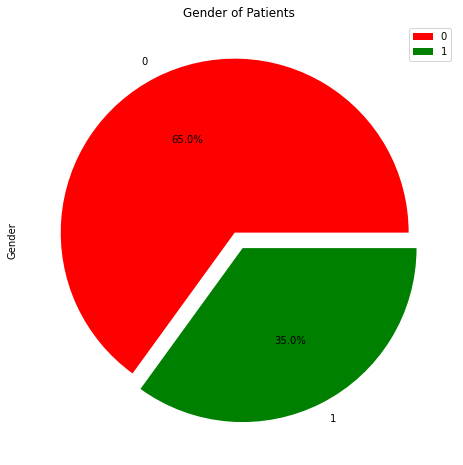

In [24]:
#Percentagas of patient that showed compared to the NoShow patients. "0" IMPLIES FEMALE, "1" IMPLIES MALE
percent = 100*data['Gender'].value_counts()/len(data['NoShow'])
percent.plot(kind = 'pie', figsize=(8, 8), autopct='%1.1f%%', legend = True, explode=[0.05, 0.05], colors = ['Red', 'Green'])
plt.title('Gender of Patients')
#This code drills down into the number of NoShows in the gender column, and plots it against the length of the NoShow column
#I added a title, legend and put it at an appropraite size to enable readability of the pie chart
#I also sliced out the portion I needed to be highlighted, and put it in red.

The above pie chart shows that Females (denoted as 0) are more likely to miss their doctors appointment, with 65% of the total amount of patients to miss their appoinments being women.

In [25]:
#QUESTION 3: THE PERCENTAGE OF "NO SHOWS" BY EACH AILMENT (HYPERTENSION, DIABETES, ALCOHOLISM, HANDICAP)

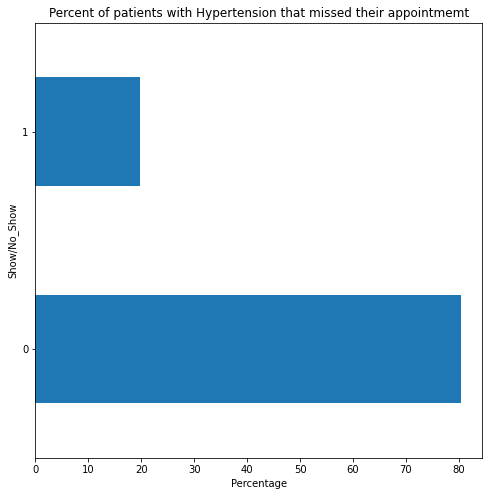

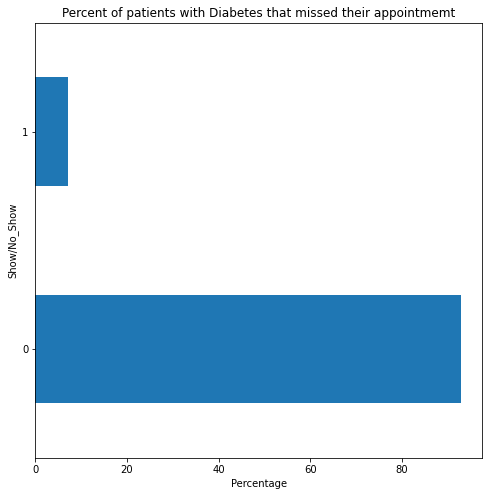

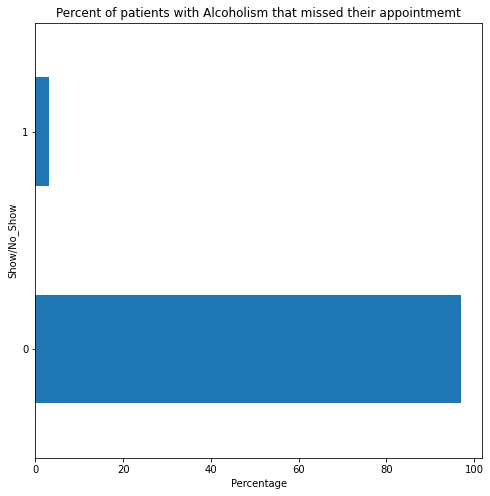

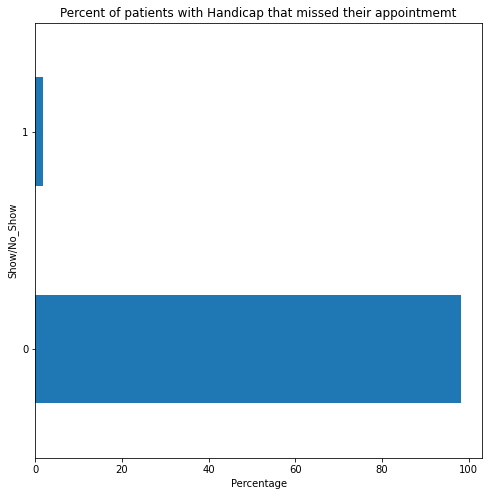

In [26]:
#This function picks out each of the ailments, and plots them against NoShow
labels = ['Hypertension', 'Diabetes','Alcoholism', 'Handicap']
def plot_barh():
    for label in labels:
        percent = 100*data[label].value_counts()/len(data['NoShow'])
        percent.plot(kind = 'barh', figsize=(8, 8))
        plt.title('Percent of patients with' + ' ' + label + ' ' + 'that missed their appointmemt')
        plt.xlabel("Percentage")
        plt.ylabel("Show/No_Show")
        plt.show()
plot_barh()

In each of the bar charts above, we can see how patients with different ailments and the percentage of patients missing these appointments

# Conclusion 

Results: Our data suggests that
1. Not too many people currently miss their appointments, only 20%
2. The 20% that miss their appoinments are predominatly females 
3. People with Hypertension miss their appoinments the most
4. Handicap patients are most likely to show up for their appointment

Limitations: 
1. The data is mostly categorical, so we cannot tell if a patient misses an appointment due to a different reason
2. We cannot tell why people who are handicap seem to almost never miss an appointment 
3. We cannot tell why people with hypertension are most likely not to miss an appointment 

References
https://www.youtube.com/watch?v=kJdta28q7vg&list=WL&index=4
https://www.youtube.com/watch?v=sSAKsB7YnEE&list=WL&index=5